In [ ]:
from smach_utils2 import *

In [ ]:
tfBuffer = tf2.Buffer()

listener = tf2.TransformListener(tfBuffer)
b_tf=tf2.TransformBroadcaster()
b_st=tf2.StaticTransformBroadcaster()


In [ ]:
def write_tf(pose, q, child_frame , parent_frame='map',time=0):
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
def read_tf(t):
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat


In [ ]:
res=segmentation_server.call()

In [ ]:
res

In [ ]:
poses=np.asarray(res.poses.data)

poses=poses.reshape((int(len(poses)/3) ,3     )      )

In [ ]:
head.set_named_target('neutral')

In [ ]:
#t=write_tf(res.poses.data,(0,0,0,1),'Target',"head_rgbd_sensor_depth_frame",0)
t=write_tf(poses[0,:],(0,0,0,1),'Target_tmp',"head_rgbd_sensor_depth_frame",0) ## CHOOSE A TARGET 

b_tf.sendTransform(t)
rospy.sleep(0.2)
tt=tfBuffer.lookup_transform('map','object_0',rospy.Time(0))
rospy.sleep(0.2)
tt
pose,quat= read_tf(tt)
t=write_tf(pose,(0,0,0,1),'Target')
b_st.sendTransform(t)


In [ ]:
#head = moveit_commander.MoveGroupCommander('head')
#gripper =  moveit_commander.MoveGroupCommander('gripper')
#arm=moveit_commander.MoveGroupCommander('arm')
from smach_utils2 import *
whole_body= moveit_commander.MoveGroupCommander('whole_body')

In [ ]:
brazo.set_named_target('go')

In [ ]:
pose=whole_body.get_current_pose()
type(pose)

In [ ]:
whole_body.set_pose_target(tar_pose)
plan=whole_body.plan()
if len (plan)>0:whole_body.go()
else:print('nope')

In [ ]:
plan

In [ ]:
tar_pose=PoseStamped()
tar_pose.pose.position.x=.9
tar_pose.pose.position.y=-1.06
tar_pose.pose.position.z=.56
tar_pose.pose.orientation.x=-1.0

tar_pose.header.frame_id='odom'

In [ ]:
whole_body.set_start_state_to_current_state()
whole_body.set_pose_target(pose)
plan=whole_body.plan()
print (len(plan))


In [ ]:
whole_body.go()

In [ ]:
#whole_body=moveit_commander.MoveGroupCommander('whole_body')

In [ ]:
clear_octo_client()
arm_grasp_from_above = [0.3, -2.0, 0.0, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:
head.set_named_target('neutral')
head.go()
clear_octo_client()


In [ ]:
#
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]#
wb_gp.pose.position.z= pose[2]+0.3   ##Pre Grasp from above


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
if plan[0]:
    succ=whole_body.go()
else:
    print('No plan')

In [ ]:
succ

In [ ]:
t=tfBuffer.lookup_transform('hand_palm_link', 'Target',rospy.Time())

In [ ]:
pose,_=read_tf(t)
pose

In [ ]:
goal_p=whole_body.get_current_pose()
goal_p.pose.position.x=0.1
goal_p.pose.position.y=pose[1]
goal_p.pose.position.z=pose[2]+0.2
#goal_p.pose.orientation.w=quat[0]
#goal_p.pose.orientation.x=quat[1]
#goal_p.pose.orientation.y=quat[2]
#goal_p.pose.orientation.z=quat[3]



In [ ]:
whole_body.set_pose_target(goal_p)

In [ ]:
whole_body.plan()

In [ ]:
goal_p=whole_body.get_current_pose()

In [ ]:
whole_body.set_pose_target(goal_p)
whole_body.plan()

In [ ]:
whole_body.go()

In [ ]:
res.poses.data

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time())

In [ ]:
pose,quat=read_tf(t)

In [ ]:
goal_pose= Pose()

In [ ]:
goal_pose.position.x=pose[0]
goal_pose.position.y=pose[1]
goal_pose.position.z=pose[2]

In [ ]:
pose,goal_pose

In [ ]:
whole_body.get_current_pose()

In [ ]:
wb=whole_body.get_current_joint_values()

In [ ]:
wb[4]=0.1

In [ ]:
whole_body.go(wb)

In [ ]:
pose=whole_body.get_current_pose()

In [ ]:
type(pose.pose.orientation)

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
gp=whole_body.get_current_pose()

In [ ]:

gp.pose.orientation
pose=gp
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])

In [ ]:
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tfBuffer.lookup_transform('hand_palm_link','New:static_Target',rospy.Time(0))

In [ ]:
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)

In [ ]:
wb_gp=whole_body.get_current_pose()

In [ ]:
eu=tf.transformations.euler_from_quaternion((wb_gp.pose.orientation.w,wb_gp.pose.orientation.x,wb_gp.pose.orientation.y,wb_gp.pose.orientation.z))
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)
rotated=tf.transformations.quaternion_multiply(quat,rot_quat)



In [ ]:
wb_gp.pose.position.x-=0.1
wb_gp.pose.position.y+=0.1
wb_gp.pose.position.z-=0.1


In [ ]:
wb_gp.pose.orientation.w=rotated[0]
wb_gp.pose.orientation.x=rotated[1]
wb_gp.pose.orientation.y=rotated[2]
wb_gp.pose.orientation.z=rotated[3]

In [ ]:
whole_body.set_pose_target(wb_gp)

In [ ]:

plan=whole_body.plan()
plan

In [ ]:
if plan[0]:
    whole_body.go()

In [ ]:
whole_body.go()

In [ ]:
arm_grasp_from_above = [0.19263830140116414, -2.2668981568652917, -0.007358947463759424, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:

t=tfBuffer.lookup_transform('New:static_Target','hand_palm_link',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat
np.save('above_quat.npy',quat)

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
plan

In [ ]:

whole_body.go()

In [ ]:
wb_v=whole_body.get_current_joint_values()


In [ ]:
gripper = GRIPPER()

In [ ]:
gripper.close()

In [ ]:
gripper =  moveit_commander.MoveGroupCommander('gripper')

In [ ]:

|
tf_man.pub_static_tf()

In [ ]:
head.set_joint_values([0.0, -0.77])


In [ ]:
print ('rdy')

In [ ]:
brazo.set_named_target('go')
head.set_joint_values([0.0, -0.77])
res=segmentation_server.call()
if len(res.poses.data)==0: print( 'failed')
else:

    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  





    tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(point_name='target', new_frame='map')
    rospy.sleep(0.3)
    pose, _ =tf_man.getTF('target')
    tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


    head.set_named_target('neutral')

In [ ]:
poses=np.asarray(res.poses.data)
poses=poses.reshape((int(len(poses)/3) ,3     )      )  





tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO

In [ ]:
tf_man.change_ref_frame_tf(point_name='target', new_frame='map')


In [ ]:
pose, _ =tf_man.getTF('target')
tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


In [ ]:
head.set_named_target('neutral')

In [ ]:
 clear_octo_client()
#############################10 * 2 *np.pi / 360 ####pi /2
arm_grasp_from_above = [0.2, -1.57, -0.13 , -1.57, 0.0, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)   

In [ ]:
clear_octo_client()
pose, quat=tf_man.getTF('Target')

wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2

whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()

In [ ]:
pos,rot=tf_man.getTF(target_frame=,ref)
pos

In [ ]:
from smach_utils2 import *

In [ ]:
from smach_utils2 import *


In [ ]:
wb_gp=whole_body.get_current_pose()            
wb_gp.header.frame_id="Target"
wb_gp.pose.position.x=0.02669
wb_gp.pose.position.y=0.045
wb_gp.pose.position.z= 0.033
wb_gp.pose.orientation.w=-0.990
wb_gp.pose.orientation.x= 0.0246
wb_gp.pose.orientation.y= -0.0085
wb_gp.pose.orientation.z= 0.1345



In [ ]:
aaa

In [ ]:
from smach_ros import ActionServerWrapper

In [ ]:
res = speech_recog_server()

In [ ]:
res.data

#msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg

In [ ]:
if len(res.data.split(' '))>1:print(res.data.split(' ')[-1])    ### Number of words


In [ ]:
from ros_whisper_vosk.srv import SetGrammarVosk
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar(['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi'])  ##PRESET NAMES

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
msg

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg.data
if len(msg.data.split(' '))>1:print(msg.data.split(' ')[-1]) 

In [ ]:

res=get_keywords_speech(10)
res

In [ ]:
drinks=['coke','juice','beer', 'water', 'soda', 'wine']
names=['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi']
confirmation=['yes','no']
gram=drinks+names+confirmation

set_grammar(gram)  ##PRESET DRINKS


In [ ]:
res2 = get_keywords_speech(10)
if res2 in['yes','jack','juice']:print('chido',res2)
else: print ('chale',res2)

In [ ]:
set_grammar(['yes','no'])

In [ ]:
res2 in ['yes', 'no']

In [ ]:
res2='not'

In [ ]:
import matplotlib.pyplot as plt

#map_msg= rospy.wait_for_message('/prohibition_layer_map', OccupancyGrid)
map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid)
inflated_map= np.asarray(map_msg.data)

In [ ]:
map_msg.info.width

In [ ]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))



In [ ]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))


plt.imshow(img_map)

In [ ]:
img_map[237,474]

In [ ]:
from smach_utils2 import *


In [ ]:
brazo.set_named_target()
head.set_joint_values([0,-1])


In [ ]:
res=segmentation_server.call()
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

if len(res.poses.data)==0: print( 'failed')
else:
    print('object found')
    
    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  
    num_objs=len(poses)
    print (num_objs)
    for i,pose in enumerate(poses):
        #print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        point_name=f'object_{i}'
        tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
        rospy.sleep(0.3)
        tf_man.change_ref_frame_tf(point_name=point_name, new_frame='map')
        rospy.sleep(0.3)
        pose,_= tf_man.getTF(point_name)
        print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of arena, occupied inflated map')
            tf_man.pub_static_tf(pos=[0,0,0], point_name=point_name, ref='head_rgbd_sensor_rgb_frame')
            num_objs-=1
        print (f"object found at robot coords.{pose} ")

print(num_objs)

In [ ]:
contoured=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m),contoured)

In [ ]:
pose

In [ ]:
contoured[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]


In [ ]:
#FREE SPACE . SO IT IS A PLAUSIBLE HYPOTHESIS OF A TRASH OBJECT

In [ ]:
pose

In [ ]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

In [ ]:

import matplotlib.pyplot as plt
plt.imshow(img_map)

In [ ]:
origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m) 

In [ ]:
img_map[200,474]

In [ ]:
img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m) ]


#img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m) ]

In [ ]:
origin_map_img=[round(contoured.shape[0]*0.5) ,round(contoured.shape[1]*0.5)]
pose,_= tf_man.getTF('object_0')

contoured=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m),img_map)
plt.imshow(contoured)

In [ ]:
contoured[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]#### Yes axes seem to be "flipped"

In [ ]:

contoured[origin_map_img[1],origin_map_img[0]]

In [ ]:
robot=get_robot_px()
draw_at(origin_map_img[0]+robot[0]+round(pose[0]/pix_per_m) ,origin_map_img[1] -robot[1] - round(pose[1]/pix_per_m),contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')

In [ ]:
contoured[origin_map_img[1]- round(pose[1]/pix_per_m),origin_map_img[0]- round(pose[0]/pix_per_m)]

In [ ]:
contoured[0,0]

In [ ]:
contoured[origin_map_img[0]- round(pose[0]/pix_per_m),origin_map_img[1]- round(pose[1]/pix_per_m)]

In [ ]:
c=point_to_px(pose[0],pose[1])
robot=get_robot_px()
draw_at(1024+robot[1]+c[0],1024+robot[0]+c[1],contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')


In [ ]:
contoured[c[0]+1024,c[1]+1024]

In [ ]:

check_point_map(pose[0],pose[1])

In [ ]:
import matplotlib.pyplot as plt
from smach_utils2 import *

def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat


In [ ]:
broadcaster = tf2_ros.TransformBroadcaster()
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
points_data = ros_numpy.numpify(points_msg)    
image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
def correct_points(points_msg):

    # Function that transforms Point Cloud reference frame from  head, to map. (i.e. sensor coords to map coords )
    # img= correct_points() (Returns rgbd depth corrected image)    
    #points msg in 
    #data = rospy.wait_for_message('/hsrb/head_rgbd_sensor/depth_registered/rectified_points', PointCloud2)
    

    np_data=ros_numpy.numpify(points_msg)

    try:
        trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
                    
        trans,rot=read_tf(trans)
        #print ("############head",trans,rot)
    except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
        print ( 'No head TF FOUND')

    #trans,rot=tf_listener.lookupTransform('/map', '/head_rgbd_sensor_rgb_frame', rospy.Time(0))
    #print ("############TF1",trans,rot)
    eu=np.asarray(tf.transformations.euler_from_quaternion(rot))
    t=TransformStamped()
    rot=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
    #rot=tf.transformations.quaternion_from_euler(-eu[1],0,0)
    t.header.stamp = points_msg.header.stamp
    t.transform.rotation.x = rot[0]
    t.transform.rotation.y = rot[1]
    t.transform.rotation.z = rot[2]
    t.transform.rotation.w = rot[3]
    cloud_out = do_transform_cloud(points_msg, t)
    np_corrected=ros_numpy.numpify(cloud_out)
    corrected=np_corrected.reshape(np_data.shape)
    img= np.copy(-corrected['z'])
    img[np.isnan(img)]=2
    img_corrected = np.where((img<trans[2]*0.96) ,img,5)
    #Returns img with xyz info  and points datastructure ( see numpify a ptcloud2)
    return img_corrected , corrected

In [ ]:
#############################################
#points_data = ros_numpy.numpify(points_msg)    
#image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
#image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
#image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
#rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
##
_,corrected=correct_points(points_msg)  ### aplica la transformada de la camara para corregir la perspectiva
zs_no_nans=np.where(~np.isnan(corrected['z']),corrected['z'],1)   
histogram, bin_edges =(np.histogram(zs_no_nans, bins=100))
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z
#print (bin_edges,histogram[:-1].argmax(), histogram[:-1].argmax())
plane_height= (trans)+bin_edges[histogram[:-1].argmax()]
print(plane_height, 'plane_height')
################################

In [ ]:
points_msg = rospy.wait_for_message('/hsrb/head_rgbd_sensor/depth_registered/rectified_points', PointCloud2)


In [ ]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
im_corrected,corrected=correct_points(points_msg)  ### aplica la transformada de la camara para corregir la perspectiva
zs_no_nans=np.where(~np.isnan(corrected['z']),corrected['z'],1)   
histogram, bin_edges =(np.histogram(zs_no_nans, bins=100))
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z
#print (bin_edges,histogram[:-1].argmax(), histogram[:-1].argmax())
plane_height= (trans)+bin_edges[histogram[:-1].argmax()]
print(plane_height, 'plane_height')
plt.imshow(im_corrected,cmap='prism')


In [ ]:
cc=[np.mean(corrected['x'][248:340,273:394]),
np.mean(corrected['y'][248:340,273:394]),
np.mean(corrected['z'][248:340,273:394]) 
   ]

In [ ]:
cc

In [ ]:
plt.imshow(corrected['z'][248:340,273:394],cmap='prism')


In [ ]:
plt.imshow(im_corrected[300:427,192:224],cmap='prism')


In [ ]:
plt.imshow(im_corrected[90:160,50:185],cmap='prism')


In [ ]:
im_corrected[0,0]

In [ ]:
plt.imshow(im_corrected[273:394,248:340],cmap='prism')


In [ ]:
thres_floor=0.01
im_corrected = np.where((zs_no_nans >-trans+thres_floor+plane_height),zs_no_nans,1)
plt.imshow(im_corrected)

In [ ]:
-trans-thres_floor+plane_height

In [ ]:
im_corrected[300:350,500:550]

In [ ]:
plt.imshow(im_corrected)

In [ ]:
plane_height= (trans)+bin_edges[histogram[:-1].argmax()+1]
img_corrected = np.where((-zs_no_nans < (trans*0.999)-plane_height-thres_t),zs_no_nans,1)

In [ ]:
corrected['z'][200:300,500:600]

In [ ]:
plt.imshow(corrected['z'])

In [ ]:
np_data=ros_numpy.numpify(points_msg)

try:
    trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())

    trans,rot=read_tf(trans)
    #print ("############head",trans,rot)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
    print ( 'No head TF FOUND')
eu=np.asarray(tf.transformations.euler_from_quaternion(rot))
t=TransformStamped()
rot=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
#rot=tf.transformations.quaternion_from_euler(-eu[1],0,0)
t.header.stamp = points_msg.header.stamp
t.transform.rotation.x = rot[0]
t.transform.rotation.y = rot[1]
t.transform.rotation.z = rot[2]
t.transform.rotation.w = rot[3]
cloud_out = do_transform_cloud(points_msg, t)
np_corrected=ros_numpy.numpify(cloud_out)
corrected=np_corrected.reshape(np_data.shape)
img= np.copy(-corrected['z'])
img[np.isnan(img)]=2
img_corrected = np.where((img<trans[2]*0.96) ,img,5)
plt.imshow(img_corrected)

In [ ]:
brazo.set_named_target('go')

In [ ]:
plt.imshow(np_data['z'])

In [ ]:
 contours, hierarchy = cv2.findContours(img_corrected.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i=0
cents=[]
points=[]
points_c=[]
images=[]
for i, contour in enumerate(contours):
    
    area = cv2.contourArea(contour)
    if area<100 or area >10000:pass
    else:
        
        M = cv2.moments(contour)
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print (cv2.contourArea(contour))
        boundRect = cv2.boundingRect(contour)
        image_aux= image[boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]]
        images.append(image_aux)
        image_aux= img_corrected[boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]]
        mask=np.where(image_aux!=5)
        npmask=np.asarray(mask).T
        
        rgb_image=cv2.rectangle(rgb_image,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), (255,255,0), 2)
        iim=cv2.drawContours(rgb_image, contour, -1, (0,255,0), 10)
        

In [ ]:
plt.imshow(iim)

In [ ]:
xyz=[]
if len (npmask)>0:
    for a in npmask:
        ix,iy=a[0],a[1]
        print(ix)
        #aux=(np.asarray((points_data['x'][boundRect[1]+ix,boundRect[0]+iy],points_data['y'][boundRect[1]+ix,boundRect[0]+iy],points_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        aux=(np.asarray((np_data['x'][boundRect[1]+ix,boundRect[0]+iy],np_data['y'][boundRect[1]+ix,boundRect[0]+iy],np_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        
        if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                'reject point'
        else:
            #print (xyz)
            xyz.append(aux)


In [ ]:
i=0
x,y,z=np.asarray(xyz).mean(axis=0)
if np.isnan(x) or np.isnan(y) or np.isnan(z):
    print('nan')
else:
    t=write_tf(    (x,y,z), (0,0,0,1), 'Object'+str(i), "head_rgbd_sensor_rgb_frame"   )  
broadcaster.sendTransform(t)

In [ ]:
plt.imshow(corrected['z'][boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]])

In [ ]:
xyz=[]
if len (npmask)>0:
    for a in npmask:
        ix,iy=a[0],a[1]
        #aux=(np.asarray((points_data['x'][boundRect[1]+ix,boundRect[0]+iy],points_data['y'][boundRect[1]+ix,boundRect[0]+iy],points_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        aux=(np.asarray((corrected['x'][boundRect[1]+ix,boundRect[0]+iy],corrected['y'][boundRect[1]+ix,boundRect[0]+iy],corrected['z'][boundRect[1]+ix,boundRect[0]+iy])))
        print (aux)
        if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                'reject point'
        else:
            xyz.append(aux)

In [ ]:
np.asarray(xyz).mean(axis=0)

In [ ]:
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
    

In [ ]:
zs_no_nans=np.where(~np.isnan(corrected['z']),corrected['z'],1)
histogram, bin_edges =(np.histogram(zs_no_nans, bins=100))
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z
plane_height= (trans)+bin_edges[histogram[:-1].argmax()+1]
print(plane_height, 'plane_height')


In [ ]:
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z


# Quito piso desde altura robot(sensor) + un threshold (hacia abajo) -> thres_floor
img_corrected = np.where((zs_no_nans >-trans-0.03),zs_no_nans,1)

In [ ]:
corrected['z'][200,200]

In [ ]:
img_corrected

In [ ]:
plane_height

In [ ]:
for i, contour in enumerate(contours):
    boundRect = cv2.boundingRect(contour)

In [ ]:
img_corrected

In [ ]:
import matplotlib.pyplot as plt

contours, hierarchy = cv2.findContours(im_corrected.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
def segment_floor(points_data,zs_no_nans,obj_hMax=0.85,obj_lMax=1.5,thres_floor=0.03):
    # obj_hMax -> altura maxima para objetos para segmentar
    # obj_lMax -> distancia de objetos maxima para segmentar

    # Quita piso y mayor a una cierta altura
    t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
    trans=t.transform.translation.z
    
    # Quito piso desde altura robot(sensor) + un threshold (hacia abajo) -> thres_floor
    img_corrected = np.where((zs_no_nans >-trans-thres_floor),zs_no_nans,1)
    # Quito objetos mayores a una altura -> obj_hMax
    img_corrected = np.where((img_corrected < -obj_hMax),img_corrected,1)
    

    # Quita objetos lejanos
    ls_no_nans=np.where(~np.isnan(points_data['z']),points_data['z'],5)
    
    lZ_no_nans=np.where(ls_no_nans<obj_lMax,ls_no_nans,5)
    
    # Con esto, quita en z los que en X (alturas) esten con 5
    for r in range(img_corrected.shape[0]):
        for c in range(img_corrected.shape[1]):
            if lZ_no_nans[r,c]>=5:
                img_corrected[r,c]=1
    
    return img_corrected


In [ ]:
plt.imshow(corrected['z'])

In [ ]:
corrected['z'][200,200]

In [ ]:
head.set_joint_values([0,-0.7])

In [ ]:
tf_man.getTF('object_0')

In [ ]:
point_name=f'object_{i}'
tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')

In [ ]:
player_pose=[0.3, -0.87, 0.0, -0.75, -0.03, 0.0]


In [ ]:
arm.set_joint_value_target(player_pose)

In [ ]:
plan=arm.plan()

In [ ]:
arm.go()

In [ ]:
arm.get_current_joint_values()

In [ ]:
omni_base.move_base(known_location='room2')

In [ ]:
head.set_joint_values([0,-0.7])

In [ ]:
arm=moveit_commander.MoveGroupCommander('arm')

In [ ]:
av= arm.get_current_joint_values()
av[0]=0.22
av[3]=av[1]
av

In [ ]:
arm.go(av)

In [ ]:
omni_base.tiny_move(velY=-0.1,std_time=1.5)

In [ ]:
from smach_utils2 import *
hand_rgb= HAND_RGB()


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(hand_rgb.get_image())

In [ ]:
img=hand_rgb.get_image()
img_msg  = bridge.cv2_to_imgmsg(img)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
#bridge.imgmsg_to_cv2(res.debug_image)
plt.imshow(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]))

In [ ]:
obj_name='003_cracker_box'
for i,name in enumerate(res.names):
    print(i,name.data)
    if (name.data== obj_name):break
print ('BBX',res.pt_min.data[2*i+1],res.pt_max.data[2*i+1],  res.pt_min.data[2*i],res.pt_max.data[2*i])
crop_img=img[res.pt_min.data[2*i+1]:res.pt_max.data[2*i+1]   ,  res.pt_min.data[2*i]:res.pt_max.data[2*i]]
cv2.LineSegmentDetector()
plt.imshow(crop_img)
i

In [ ]:
dst = cv2.Canny(crop_img, 50, 200, None, 3)
    
# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
plt.imshow(dst)

In [ ]:
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
thetas=[]
for line in linesP:
    thetas.append(np.arctan2(line[0][0]-line[0][2], line[0][1]-line[0][3]))
histogram, bin_edges =(np.histogram(thetas, bins=100))
bin_edges[histogram[:-1].argmax()]

In [ ]:
plt.imshow(cdstP)

In [ ]:

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        print ("#####################",theta)
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
#linesP[0][0][:]

In [ ]:
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
thetas=[]
for line in linesP:
    thetas.append(np.arctan2(line[0][0]-line[0][2], line[0][1]-line[0][3]))
histogram, bin_edges =(np.histogram(thetas, bins=100))
bin_edges[histogram[:-1].argmax()]

In [ ]:
histogram

In [ ]:
thetas

In [ ]:
plt.imshow(cdstP)

In [ ]:
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
lines

In [ ]:
for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        print (theta)

In [ ]:

res.pt_max.data[i:i+2],res.pt_min.data[i:i+2],i


In [ ]:

res.pt_max.data[0]-res.pt_min.data[0]> res.pt_max.data[1]-res.pt_min.data[1]
av= arm.get_current_joint_values()
av[-2]+=0.3   #wrist roll
arm.go(av)


#if res.pt_max.data[0]-res.pt_min.data[0]> res.pt_max.data[1]-res.pt_min.data[1]:
    
    

In [ ]:
arm.get_current_joint_values()

In [ ]:
tf_man.getTF(ref_frame='static024_bowl',target_frame='base_link')

In [ ]:
tf_man

In [3]:
from smach_utils2 import *
rgbd= RGBD()

In [4]:
img=rgbd.get_image()
pts= rgbd.get_points()

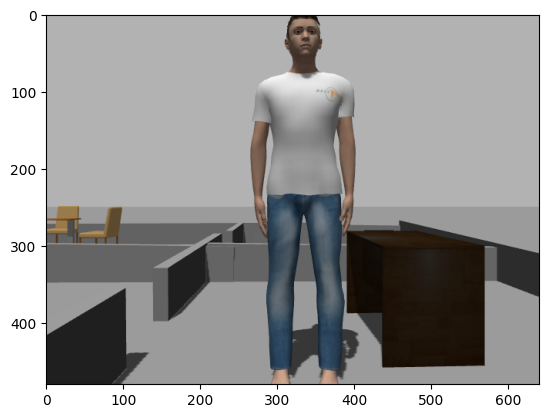

In [5]:
import matplotlib.pyplot as plt
import os
plt.imshow(img)

In [6]:
usr_url=os.path.expanduser( '~' )
protoFile = usr_url+"/openpose/models/pose/body_25/pose_deploy.prototxt"
weightsFile = usr_url+"/openpose/models/pose/body_25/pose_iter_584000.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [7]:
print (img.shape)
frame=img
inHeight = frame.shape[0]
inWidth = frame.shape[1]
# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
# Set the prepared object as the input blob of the network
net.setInput(inpBlob)
output = net.forward()

(480, 640, 3)


[ WARN] [1705367372.219775900]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 114.343000 according to authority /pose_integrator
[ WARN] [1705367372.219829972]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 114.343000 according to authority /pose_integrator
[ WARN] [1705367372.219873235]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 114.343000 according to authority /pose_integrator
[ WARN] [1705367372.219902364]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 114.343000 according to authority /pose_integrator
[ WARN] [1705367372.219931787]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 114.343000 according to authority /pose_integrator
[ WARN] [1705367372.219974290]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 114.343000 according to authority /pose_integrator
[ WARN] [1705367372.22001111

[[-0.16972865, -0.28717297, 2.187148], [-0.17573649, -0.019874156, 2.1861186], [0.27968994, -0.295565, 2.1942468], [0.28855544, -0.032718234, 2.1822264]]


[ WARN] [1705368914.765359522]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 318.313000 according to authority /pose_integrator
[ WARN] [1705368914.765421124]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 318.313000 according to authority /pose_integrator
[ WARN] [1705368914.765462120]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 318.313000 according to authority /pose_integrator
[ WARN] [1705368914.765504575]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 318.313000 according to authority /pose_integrator
[ WARN] [1705368914.765544393]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 318.313000 according to authority /pose_integrator
[ WARN] [1705368914.765582668]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 318.313000 according to authority /pose_integrator
[ WARN] [1705368914.76562994

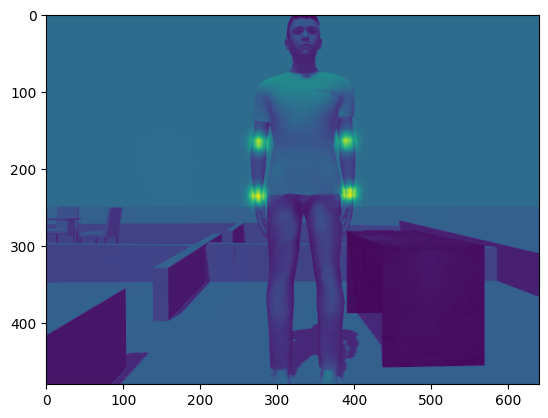

In [35]:
poses=[]
res=img[:,:,1]
for i in np.asarray((3,4,6,7)):
    
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (inWidth, inHeight))
    
    pose=[np.nanmean(pts['x'][np.where(probMap>=0.3)]),
            np.nanmean(pts['y'][np.where(probMap>=0.3)]),
            np.nanmean(pts['z'][np.where(probMap>=0.3)])]
    
    poses.append(pose)
    res= 500*probMap+ res


#res=np.ones(probMap.shape)* probMap
print (poses)
#right elbow       ####
# right wrist      ####
# left elbow
# left wrist

plt.imshow(res)

In [37]:
tf_man.pub_static_tf(pos=poses[0],point_name='right_elbow', ref='head_rgbd_sensor_rgb_frame')
tf_man.change_ref_frame_tf(point_name='right_elbow')
tf_man.pub_static_tf(pos=poses[1],point_name='right_wrist', ref='head_rgbd_sensor_rgb_frame')
tf_man.change_ref_frame_tf(point_name='right_wrist')
tf_man.pub_static_tf(pos=poses[2],point_name='left_elbow', ref='head_rgbd_sensor_rgb_frame')
tf_man.change_ref_frame_tf(point_name='left_elbow')
tf_man.pub_static_tf(pos=poses[3],point_name='left_wrist', ref='head_rgbd_sensor_rgb_frame')
tf_man.change_ref_frame_tf(point_name='left_wrist')

True

[ WARN] [1705368926.038229462]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 323.821000 according to authority /pose_integrator
[ WARN] [1705368926.038284575]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 323.821000 according to authority /pose_integrator
[ WARN] [1705368926.038326040]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 323.821000 according to authority /pose_integrator
[ WARN] [1705368926.038355463]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 323.821000 according to authority /pose_integrator
[ WARN] [1705368926.038382995]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 323.821000 according to authority /pose_integrator
[ WARN] [1705368926.038412275]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 323.821000 according to authority /pose_integrator
[ WARN] [1705368926.03844712

In [20]:
wrist_xyz=tf_man.getTF(target_frame='right_wrist')
elbow_xyz=tf_man.getTF(target_frame='right_elbow')
v= np.asarray(wrist_xyz[0])-np.asarray(elbow_xyz[0])
t=elbow_xyz[0][2]-v[2]
x= elbow_xyz[0][0]+ t*v[0]
y= elbow_xyz[0][1]+ t*v[1]
tf_man.pub_static_tf(pos=[x,y,0],point_name='point_right')


In [39]:
wrist_xyz=tf_man.getTF(target_frame='left_wrist')
elbow_xyz=tf_man.getTF(target_frame='left_elbow')
v= np.asarray(wrist_xyz[0])-np.asarray(elbow_xyz[0])
t=elbow_xyz[0][2]-v[2]
x= elbow_xyz[0][0]+ t*v[0]
y= elbow_xyz[0][1]+ t*v[1]
tf_man.pub_static_tf(pos=[x,y,0],point_name='point_left')


[ WARN] [1705368999.093456450]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 331.595000 according to authority /pose_integrator
[ WARN] [1705368999.093519752]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 331.595000 according to authority /pose_integrator
[ WARN] [1705368999.093561644]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 331.595000 according to authority /pose_integrator
[ WARN] [1705368999.093601427]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 331.595000 according to authority /pose_integrator
[ WARN] [1705368999.093640007]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 331.595000 according to authority /pose_integrator
[ WARN] [1705368999.093677213]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 331.595000 according to authority /pose_integrator
[ WARN] [1705368999.09371607

[ WARN] [1705369013.749162120]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 339.267000 according to authority /pose_integrator
[ WARN] [1705369013.749234648]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 339.267000 according to authority /pose_integrator
[ WARN] [1705369013.749272285]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 339.267000 according to authority /pose_integrator
[ WARN] [1705369013.749308334]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 339.267000 according to authority /pose_integrator
[ WARN] [1705369013.749346241]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 339.267000 according to authority /pose_integrator
[ WARN] [1705369013.749383462]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 339.267000 according to authority /pose_integrator
[ WARN] [1705369013.74941655

[ WARN] [1705369028.251926780]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 346.850000 according to authority /pose_integrator
[ WARN] [1705369028.251979472]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 346.850000 according to authority /pose_integrator
[ WARN] [1705369028.252022210]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 346.850000 according to authority /pose_integrator
[ WARN] [1705369028.252065510]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 346.850000 according to authority /pose_integrator
[ WARN] [1705369028.252114854]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 346.850000 according to authority /pose_integrator
[ WARN] [1705369028.252153247]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 346.850000 according to authority /pose_integrator
[ WARN] [1705369028.25219345

[ WARN] [1705369046.030104837]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 355.185000 according to authority /pose_integrator
[ WARN] [1705369046.030160065]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 355.185000 according to authority /pose_integrator
[ WARN] [1705369046.030199351]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 355.185000 according to authority /pose_integrator
[ WARN] [1705369046.030232841]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 355.185000 according to authority /pose_integrator
[ WARN] [1705369046.030265237]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 355.185000 according to authority /pose_integrator
[ WARN] [1705369046.030319824]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 355.185000 according to authority /pose_integrator
[ WARN] [1705369046.03035108

[ WARN] [1705369075.337056984]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 369.011000 according to authority /pose_integrator
[ WARN] [1705369075.337142338]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 369.011000 according to authority /pose_integrator
[ WARN] [1705369075.337187426]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 369.011000 according to authority /pose_integrator
[ WARN] [1705369075.337231244]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 369.011000 according to authority /pose_integrator
[ WARN] [1705369075.337273166]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 369.011000 according to authority /pose_integrator
[ WARN] [1705369075.337314077]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 369.011000 according to authority /pose_integrator
[ WARN] [1705369075.33735717

[ WARN] [1705369082.230130380]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 372.570000 according to authority /pose_integrator
[ WARN] [1705369082.230174281]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 372.570000 according to authority /pose_integrator
[ WARN] [1705369082.230200473]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 372.570000 according to authority /pose_integrator
[ WARN] [1705369082.230224514]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 372.570000 according to authority /pose_integrator
[ WARN] [1705369082.230248624]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 372.570000 according to authority /pose_integrator
[ WARN] [1705369082.230272035]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 372.570000 according to authority /pose_integrator
[ WARN] [1705369082.23030232

[ WARN] [1705369097.989590647]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 380.193000 according to authority /pose_integrator
[ WARN] [1705369097.989648092]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 380.193000 according to authority /pose_integrator
[ WARN] [1705369097.989685103]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 380.193000 according to authority /pose_integrator
[ WARN] [1705369097.989718641]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 380.193000 according to authority /pose_integrator
[ WARN] [1705369097.989751971]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 380.193000 according to authority /pose_integrator
[ WARN] [1705369097.989784632]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 380.193000 according to authority /pose_integrator
[ WARN] [1705369097.98980944

[ WARN] [1705369109.100546597]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 385.858000 according to authority /pose_integrator
[ WARN] [1705369109.100591720]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 385.858000 according to authority /pose_integrator
[ WARN] [1705369109.100627719]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 385.858000 according to authority /pose_integrator
[ WARN] [1705369109.100666133]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 385.858000 according to authority /pose_integrator
[ WARN] [1705369109.100706074]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 385.858000 according to authority /pose_integrator
[ WARN] [1705369109.100740653]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 385.858000 according to authority /pose_integrator
[ WARN] [1705369109.10077803

[ WARN] [1705369128.437481244]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 395.586000 according to authority /pose_integrator
[ WARN] [1705369128.437530694]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 395.586000 according to authority /pose_integrator
[ WARN] [1705369128.437566281]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 395.586000 according to authority /pose_integrator
[ WARN] [1705369128.437603300]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 395.586000 according to authority /pose_integrator
[ WARN] [1705369128.437641557]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 395.586000 according to authority /pose_integrator
[ WARN] [1705369128.437680824]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 395.586000 according to authority /pose_integrator
[ WARN] [1705369128.43771432

[ WARN] [1705369138.410795557]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 400.510000 according to authority /pose_integrator
[ WARN] [1705369138.410852371]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 400.510000 according to authority /pose_integrator
[ WARN] [1705369138.410893674]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 400.510000 according to authority /pose_integrator
[ WARN] [1705369138.410926830]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 400.510000 according to authority /pose_integrator
[ WARN] [1705369138.410962736]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 400.510000 according to authority /pose_integrator
[ WARN] [1705369138.410998901]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 400.510000 according to authority /pose_integrator
[ WARN] [1705369138.41103061

[ WARN] [1705369156.341752838]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 409.320000 according to authority /pose_integrator
[ WARN] [1705369156.341834011]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 409.320000 according to authority /pose_integrator
[ WARN] [1705369156.341877482]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 409.320000 according to authority /pose_integrator
[ WARN] [1705369156.341918322]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 409.320000 according to authority /pose_integrator
[ WARN] [1705369156.341954186]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 409.320000 according to authority /pose_integrator
[ WARN] [1705369156.341992396]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 409.320000 according to authority /pose_integrator
[ WARN] [1705369156.34203000

[ WARN] [1705369167.014447191]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 414.656000 according to authority /pose_integrator
[ WARN] [1705369167.014502718]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 414.656000 according to authority /pose_integrator
[ WARN] [1705369167.014542627]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 414.656000 according to authority /pose_integrator
[ WARN] [1705369167.014571713]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 414.656000 according to authority /pose_integrator
[ WARN] [1705369167.014599739]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 414.656000 according to authority /pose_integrator
[ WARN] [1705369167.014629233]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 414.656000 according to authority /pose_integrator
[ WARN] [1705369167.01466029

[ WARN] [1705369174.443177918]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 418.567000 according to authority /pose_integrator
[ WARN] [1705369174.443235177]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 418.567000 according to authority /pose_integrator
[ WARN] [1705369174.443261376]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 418.567000 according to authority /pose_integrator
[ WARN] [1705369174.443292422]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 418.567000 according to authority /pose_integrator
[ WARN] [1705369174.443316027]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 418.567000 according to authority /pose_integrator
[ WARN] [1705369174.443340323]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 418.567000 according to authority /pose_integrator
[ WARN] [1705369174.44336418

[ WARN] [1705369184.900966645]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 423.906000 according to authority /pose_integrator
[ WARN] [1705369184.901019929]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 423.906000 according to authority /pose_integrator
[ WARN] [1705369184.901054115]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 423.906000 according to authority /pose_integrator
[ WARN] [1705369184.901088177]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 423.906000 according to authority /pose_integrator
[ WARN] [1705369184.901125467]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 423.906000 according to authority /pose_integrator
[ WARN] [1705369184.901164766]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 423.906000 according to authority /pose_integrator
[ WARN] [1705369184.90119874

[ WARN] [1705369194.006747467]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 428.607000 according to authority /pose_integrator
[ WARN] [1705369194.006807020]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 428.607000 according to authority /pose_integrator
[ WARN] [1705369194.006838448]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 428.607000 according to authority /pose_integrator
[ WARN] [1705369194.006877282]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 428.607000 according to authority /pose_integrator
[ WARN] [1705369194.006909766]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 428.607000 according to authority /pose_integrator
[ WARN] [1705369194.006943074]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 428.607000 according to authority /pose_integrator
[ WARN] [1705369194.00697049

[ WARN] [1705369208.802462211]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 435.743000 according to authority /pose_integrator
[ WARN] [1705369208.802526105]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 435.743000 according to authority /pose_integrator
[ WARN] [1705369208.802565064]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 435.743000 according to authority /pose_integrator
[ WARN] [1705369208.802599058]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 435.743000 according to authority /pose_integrator
[ WARN] [1705369208.802631495]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 435.743000 according to authority /pose_integrator
[ WARN] [1705369208.802662623]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 435.743000 according to authority /pose_integrator
[ WARN] [1705369208.80269297

[ WARN] [1705369239.282544182]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 450.991000 according to authority /pose_integrator
[ WARN] [1705369239.282604882]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 450.991000 according to authority /pose_integrator
[ WARN] [1705369239.282654154]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 450.991000 according to authority /pose_integrator
[ WARN] [1705369239.282692870]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 450.991000 according to authority /pose_integrator
[ WARN] [1705369239.282741237]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 450.991000 according to authority /pose_integrator
[ WARN] [1705369239.282786127]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 450.991000 according to authority /pose_integrator
[ WARN] [1705369239.28282347

[ WARN] [1705369255.242034533]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 458.842000 according to authority /pose_integrator
[ WARN] [1705369255.242085662]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 458.842000 according to authority /pose_integrator
[ WARN] [1705369255.242115602]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 458.842000 according to authority /pose_integrator
[ WARN] [1705369255.242144286]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 458.842000 according to authority /pose_integrator
[ WARN] [1705369255.242175464]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 458.842000 according to authority /pose_integrator
[ WARN] [1705369255.242200690]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 458.842000 according to authority /pose_integrator
[ WARN] [1705369255.24223827

[ WARN] [1705369270.011758028]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 466.195000 according to authority /pose_integrator
[ WARN] [1705369270.011823806]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 466.195000 according to authority /pose_integrator
[ WARN] [1705369270.011861171]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 466.195000 according to authority /pose_integrator
[ WARN] [1705369270.011893356]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 466.195000 according to authority /pose_integrator
[ WARN] [1705369270.011926131]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 466.195000 according to authority /pose_integrator
[ WARN] [1705369270.011957466]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 466.195000 according to authority /pose_integrator
[ WARN] [1705369270.01199361

[ WARN] [1705369286.687426403]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.557000 according to authority /pose_integrator
[ WARN] [1705369286.687483583]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.557000 according to authority /pose_integrator
[ WARN] [1705369286.687523771]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.557000 according to authority /pose_integrator
[ WARN] [1705369286.687562857]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.557000 according to authority /pose_integrator
[ WARN] [1705369286.687603367]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.557000 according to authority /pose_integrator
[ WARN] [1705369286.687643355]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 474.557000 according to authority /pose_integrator
[ WARN] [1705369286.68769186

[ WARN] [1705369300.551469441]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.443000 according to authority /pose_integrator
[ WARN] [1705369300.551512625]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.443000 according to authority /pose_integrator
[ WARN] [1705369300.551539722]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.443000 according to authority /pose_integrator
[ WARN] [1705369300.551565582]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.443000 according to authority /pose_integrator
[ WARN] [1705369300.551592059]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.443000 according to authority /pose_integrator
[ WARN] [1705369300.551624416]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 481.443000 according to authority /pose_integrator
[ WARN] [1705369300.55165307

[ WARN] [1705369314.925593976]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 488.672000 according to authority /pose_integrator
[ WARN] [1705369314.925649877]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 488.672000 according to authority /pose_integrator
[ WARN] [1705369314.925678076]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 488.672000 according to authority /pose_integrator
[ WARN] [1705369314.925717070]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 488.672000 according to authority /pose_integrator
[ WARN] [1705369314.925743279]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 488.672000 according to authority /pose_integrator
[ WARN] [1705369314.925773715]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 488.672000 according to authority /pose_integrator
[ WARN] [1705369314.92579758

[ WARN] [1705369323.601676472]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 493.069000 according to authority /pose_integrator
[ WARN] [1705369323.601735927]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 493.069000 according to authority /pose_integrator
[ WARN] [1705369323.601781173]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 493.069000 according to authority /pose_integrator
[ WARN] [1705369323.601822858]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 493.069000 according to authority /pose_integrator
[ WARN] [1705369323.601872632]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 493.069000 according to authority /pose_integrator
[ WARN] [1705369323.601915136]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 493.069000 according to authority /pose_integrator
[ WARN] [1705369323.60195547

[ WARN] [1705369333.028915900]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 497.850000 according to authority /pose_integrator
[ WARN] [1705369333.028967792]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 497.850000 according to authority /pose_integrator
[ WARN] [1705369333.029001480]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 497.850000 according to authority /pose_integrator
[ WARN] [1705369333.029035586]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 497.850000 according to authority /pose_integrator
[ WARN] [1705369333.029069954]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 497.850000 according to authority /pose_integrator
[ WARN] [1705369333.029106714]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 497.850000 according to authority /pose_integrator
[ WARN] [1705369333.02914465

[ WARN] [1705369352.044583730]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 507.078000 according to authority /pose_integrator
[ WARN] [1705369352.044650957]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 507.078000 according to authority /pose_integrator
[ WARN] [1705369352.044692287]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 507.078000 according to authority /pose_integrator
[ WARN] [1705369352.044719480]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 507.078000 according to authority /pose_integrator
[ WARN] [1705369352.044744140]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 507.078000 according to authority /pose_integrator
[ WARN] [1705369352.044775896]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 507.078000 according to authority /pose_integrator
[ WARN] [1705369352.04483245

[ WARN] [1705369359.010336568]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 510.663000 according to authority /pose_integrator
[ WARN] [1705369359.010389933]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 510.663000 according to authority /pose_integrator
[ WARN] [1705369359.010420213]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 510.663000 according to authority /pose_integrator
[ WARN] [1705369359.010447047]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 510.663000 according to authority /pose_integrator
[ WARN] [1705369359.010474490]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 510.663000 according to authority /pose_integrator
[ WARN] [1705369359.010502906]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 510.663000 according to authority /pose_integrator
[ WARN] [1705369359.01053167

[ WARN] [1705369365.361210223]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 513.948000 according to authority /pose_integrator
[ WARN] [1705369365.361257986]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 513.948000 according to authority /pose_integrator
[ WARN] [1705369365.361283133]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 513.948000 according to authority /pose_integrator
[ WARN] [1705369365.361307183]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 513.948000 according to authority /pose_integrator
[ WARN] [1705369365.361336137]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 513.948000 according to authority /pose_integrator
[ WARN] [1705369365.361362968]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 513.948000 according to authority /pose_integrator
[ WARN] [1705369365.36139109

[ WARN] [1705369386.371553261]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 524.333000 according to authority /pose_integrator
[ WARN] [1705369386.371601226]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 524.333000 according to authority /pose_integrator
[ WARN] [1705369386.371634907]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 524.333000 according to authority /pose_integrator
[ WARN] [1705369386.371665376]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 524.333000 according to authority /pose_integrator
[ WARN] [1705369386.371693590]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 524.333000 according to authority /pose_integrator
[ WARN] [1705369386.371718968]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 524.333000 according to authority /pose_integrator
[ WARN] [1705369386.37174435

[ WARN] [1705369399.584303166]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 530.799000 according to authority /pose_integrator
[ WARN] [1705369399.584352797]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 530.799000 according to authority /pose_integrator
[ WARN] [1705369399.584388671]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 530.799000 according to authority /pose_integrator
[ WARN] [1705369399.584420682]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 530.799000 according to authority /pose_integrator
[ WARN] [1705369399.584446632]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 530.799000 according to authority /pose_integrator
[ WARN] [1705369399.584471650]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 530.799000 according to authority /pose_integrator
[ WARN] [1705369399.58449714

[ WARN] [1705369413.953737646]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 538.163000 according to authority /pose_integrator
[ WARN] [1705369413.953790358]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 538.163000 according to authority /pose_integrator
[ WARN] [1705369413.953830850]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 538.163000 according to authority /pose_integrator
[ WARN] [1705369413.953871943]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 538.163000 according to authority /pose_integrator
[ WARN] [1705369413.953916114]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 538.163000 according to authority /pose_integrator
[ WARN] [1705369413.953960505]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 538.163000 according to authority /pose_integrator
[ WARN] [1705369413.95400477

[ WARN] [1705369423.489373623]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 543.027000 according to authority /pose_integrator
[ WARN] [1705369423.489425177]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 543.027000 according to authority /pose_integrator
[ WARN] [1705369423.489464256]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 543.027000 according to authority /pose_integrator
[ WARN] [1705369423.489502891]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 543.027000 according to authority /pose_integrator
[ WARN] [1705369423.489538471]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 543.027000 according to authority /pose_integrator
[ WARN] [1705369423.489572492]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 543.027000 according to authority /pose_integrator
[ WARN] [1705369423.48960819

[ WARN] [1705369439.447451246]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 551.000000 according to authority /pose_integrator
[ WARN] [1705369439.447506824]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 551.000000 according to authority /pose_integrator
[ WARN] [1705369439.447544465]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 551.000000 according to authority /pose_integrator
[ WARN] [1705369439.447583002]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 551.000000 according to authority /pose_integrator
[ WARN] [1705369439.447621682]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 551.000000 according to authority /pose_integrator
[ WARN] [1705369439.447659498]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 551.000000 according to authority /pose_integrator
[ WARN] [1705369439.44769596

[ WARN] [1705369453.721977253]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 558.154000 according to authority /pose_integrator
[ WARN] [1705369453.722024199]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 558.154000 according to authority /pose_integrator
[ WARN] [1705369453.722061910]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 558.154000 according to authority /pose_integrator
[ WARN] [1705369453.722095422]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 558.154000 according to authority /pose_integrator
[ WARN] [1705369453.722127818]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 558.154000 according to authority /pose_integrator
[ WARN] [1705369453.722160128]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 558.154000 according to authority /pose_integrator
[ WARN] [1705369453.72219568

[ WARN] [1705369468.604574640]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 565.605000 according to authority /pose_integrator
[ WARN] [1705369468.604627619]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 565.605000 according to authority /pose_integrator
[ WARN] [1705369468.604682931]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 565.605000 according to authority /pose_integrator
[ WARN] [1705369468.604719539]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 565.605000 according to authority /pose_integrator
[ WARN] [1705369468.604758368]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 565.605000 according to authority /pose_integrator
[ WARN] [1705369468.604790759]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 565.605000 according to authority /pose_integrator
[ WARN] [1705369468.60482579

[ WARN] [1705369480.717677943]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 571.806000 according to authority /pose_integrator
[ WARN] [1705369480.717727719]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 571.806000 according to authority /pose_integrator
[ WARN] [1705369480.717766280]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 571.806000 according to authority /pose_integrator
[ WARN] [1705369480.717801034]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 571.806000 according to authority /pose_integrator
[ WARN] [1705369480.717831649]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 571.806000 according to authority /pose_integrator
[ WARN] [1705369480.717865567]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 571.806000 according to authority /pose_integrator
[ WARN] [1705369480.71789812

[ WARN] [1705369485.632607612]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 574.370000 according to authority /pose_integrator
[ WARN] [1705369485.632668161]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 574.370000 according to authority /pose_integrator
[ WARN] [1705369485.632701151]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 574.370000 according to authority /pose_integrator
[ WARN] [1705369485.632732337]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 574.370000 according to authority /pose_integrator
[ WARN] [1705369485.632769756]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 574.370000 according to authority /pose_integrator
[ WARN] [1705369485.632800208]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 574.370000 according to authority /pose_integrator
[ WARN] [1705369485.63282531

[ WARN] [1705369497.971826138]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 580.497000 according to authority /pose_integrator
[ WARN] [1705369497.971877595]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 580.497000 according to authority /pose_integrator
[ WARN] [1705369497.971908610]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 580.497000 according to authority /pose_integrator
[ WARN] [1705369497.971948642]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 580.497000 according to authority /pose_integrator
[ WARN] [1705369497.971983936]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 580.497000 according to authority /pose_integrator
[ WARN] [1705369497.972011094]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 580.497000 according to authority /pose_integrator
[ WARN] [1705369497.97203649

[ WARN] [1705369519.938788893]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 591.621000 according to authority /pose_integrator
[ WARN] [1705369519.938853525]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 591.621000 according to authority /pose_integrator
[ WARN] [1705369519.938884650]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 591.621000 according to authority /pose_integrator
[ WARN] [1705369519.938908346]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 591.621000 according to authority /pose_integrator
[ WARN] [1705369519.938932336]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 591.621000 according to authority /pose_integrator
[ WARN] [1705369519.938955617]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 591.621000 according to authority /pose_integrator
[ WARN] [1705369519.93897872

[ WARN] [1705369541.393775868]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 602.421000 according to authority /pose_integrator
[ WARN] [1705369541.393826555]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 602.421000 according to authority /pose_integrator
[ WARN] [1705369541.393865043]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 602.421000 according to authority /pose_integrator
[ WARN] [1705369541.393901327]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 602.421000 according to authority /pose_integrator
[ WARN] [1705369541.393938406]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 602.421000 according to authority /pose_integrator
[ WARN] [1705369541.393971403]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 602.421000 according to authority /pose_integrator
[ WARN] [1705369541.39400263

[ WARN] [1705369556.310146568]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.044000 according to authority /pose_integrator
[ WARN] [1705369556.310192909]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.044000 according to authority /pose_integrator
[ WARN] [1705369556.310226512]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.044000 according to authority /pose_integrator
[ WARN] [1705369556.310255324]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.044000 according to authority /pose_integrator
[ WARN] [1705369556.310283318]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.044000 according to authority /pose_integrator
[ WARN] [1705369556.310309388]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 610.044000 according to authority /pose_integrator
[ WARN] [1705369556.31033911

[ WARN] [1705369579.929637105]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 621.568000 according to authority /pose_integrator
[ WARN] [1705369579.929690874]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 621.568000 according to authority /pose_integrator
[ WARN] [1705369579.929738332]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 621.568000 according to authority /pose_integrator
[ WARN] [1705369579.929775198]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 621.568000 according to authority /pose_integrator
[ WARN] [1705369579.929812285]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 621.568000 according to authority /pose_integrator
[ WARN] [1705369579.929852222]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 621.568000 according to authority /pose_integrator
[ WARN] [1705369579.92988946

[ WARN] [1705369605.810574767]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 634.505000 according to authority /pose_integrator
[ WARN] [1705369605.810628537]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 634.505000 according to authority /pose_integrator
[ WARN] [1705369605.810669861]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 634.505000 according to authority /pose_integrator
[ WARN] [1705369605.810705176]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 634.505000 according to authority /pose_integrator
[ WARN] [1705369605.810737221]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 634.505000 according to authority /pose_integrator
[ WARN] [1705369605.810777479]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 634.505000 according to authority /pose_integrator
[ WARN] [1705369605.81082225

[ WARN] [1705369619.539537063]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.476000 according to authority /pose_integrator
[ WARN] [1705369619.539584976]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.476000 according to authority /pose_integrator
[ WARN] [1705369619.539612863]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.476000 according to authority /pose_integrator
[ WARN] [1705369619.539636327]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.476000 according to authority /pose_integrator
[ WARN] [1705369619.539660509]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.476000 according to authority /pose_integrator
[ WARN] [1705369619.539683322]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 641.476000 according to authority /pose_integrator
[ WARN] [1705369619.53970596

[ WARN] [1705369631.919773520]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 647.788000 according to authority /pose_integrator
[ WARN] [1705369631.919824764]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 647.788000 according to authority /pose_integrator
[ WARN] [1705369631.919864336]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 647.788000 according to authority /pose_integrator
[ WARN] [1705369631.919902681]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 647.788000 according to authority /pose_integrator
[ WARN] [1705369631.919934910]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 647.788000 according to authority /pose_integrator
[ WARN] [1705369631.919970756]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 647.788000 according to authority /pose_integrator
[ WARN] [1705369631.92000746

[ WARN] [1705369643.483122304]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 653.685000 according to authority /pose_integrator
[ WARN] [1705369643.483178877]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 653.685000 according to authority /pose_integrator
[ WARN] [1705369643.483225539]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 653.685000 according to authority /pose_integrator
[ WARN] [1705369643.483270535]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 653.685000 according to authority /pose_integrator
[ WARN] [1705369643.483312552]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 653.685000 according to authority /pose_integrator
[ WARN] [1705369643.483351547]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 653.685000 according to authority /pose_integrator
[ WARN] [1705369643.48339129

[ WARN] [1705369652.327250834]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.278000 according to authority /pose_integrator
[ WARN] [1705369652.327311687]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.278000 according to authority /pose_integrator
[ WARN] [1705369652.327355409]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.278000 according to authority /pose_integrator
[ WARN] [1705369652.327386251]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.278000 according to authority /pose_integrator
[ WARN] [1705369652.327423606]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.278000 according to authority /pose_integrator
[ WARN] [1705369652.327467206]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 658.278000 according to authority /pose_integrator
[ WARN] [1705369652.32752236

[ WARN] [1705369676.898245837]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 670.378000 according to authority /pose_integrator
[ WARN] [1705369676.898303126]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 670.378000 according to authority /pose_integrator
[ WARN] [1705369676.898338169]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 670.378000 according to authority /pose_integrator
[ WARN] [1705369676.898371665]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 670.378000 according to authority /pose_integrator
[ WARN] [1705369676.898411126]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 670.378000 according to authority /pose_integrator
[ WARN] [1705369676.898446190]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 670.378000 according to authority /pose_integrator
[ WARN] [1705369676.89847981

[ WARN] [1705369681.690839433]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 672.723000 according to authority /pose_integrator
[ WARN] [1705369681.690896157]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 672.723000 according to authority /pose_integrator
[ WARN] [1705369681.690940535]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 672.723000 according to authority /pose_integrator
[ WARN] [1705369681.690983874]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 672.723000 according to authority /pose_integrator
[ WARN] [1705369681.691029816]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 672.723000 according to authority /pose_integrator
[ WARN] [1705369681.691080674]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 672.723000 according to authority /pose_integrator
[ WARN] [1705369681.69113042

[ WARN] [1705369695.600660330]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.722000 according to authority /pose_integrator
[ WARN] [1705369695.600714066]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.722000 according to authority /pose_integrator
[ WARN] [1705369695.600764726]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.722000 according to authority /pose_integrator
[ WARN] [1705369695.600806105]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.722000 according to authority /pose_integrator
[ WARN] [1705369695.600838233]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.722000 according to authority /pose_integrator
[ WARN] [1705369695.600870289]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 679.722000 according to authority /pose_integrator
[ WARN] [1705369695.60090769

[ WARN] [1705369707.372576569]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.677000 according to authority /pose_integrator
[ WARN] [1705369707.372624153]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.677000 according to authority /pose_integrator
[ WARN] [1705369707.372671161]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.677000 according to authority /pose_integrator
[ WARN] [1705369707.372719495]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.677000 according to authority /pose_integrator
[ WARN] [1705369707.372763010]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.677000 according to authority /pose_integrator
[ WARN] [1705369707.372801179]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 685.677000 according to authority /pose_integrator
[ WARN] [1705369707.37283027

[ WARN] [1705369732.557340786]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 698.166000 according to authority /pose_integrator
[ WARN] [1705369732.557393741]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 698.166000 according to authority /pose_integrator
[ WARN] [1705369732.557424785]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 698.166000 according to authority /pose_integrator
[ WARN] [1705369732.557455650]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 698.166000 according to authority /pose_integrator
[ WARN] [1705369732.557480576]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 698.166000 according to authority /pose_integrator
[ WARN] [1705369732.557503787]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 698.166000 according to authority /pose_integrator
[ WARN] [1705369732.55753114

[ WARN] [1705369744.943210908]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 704.336000 according to authority /pose_integrator
[ WARN] [1705369744.943251562]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 704.336000 according to authority /pose_integrator
[ WARN] [1705369744.943280171]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 704.336000 according to authority /pose_integrator
[ WARN] [1705369744.943310867]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 704.336000 according to authority /pose_integrator
[ WARN] [1705369744.943334070]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 704.336000 according to authority /pose_integrator
[ WARN] [1705369744.943357645]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 704.336000 according to authority /pose_integrator
[ WARN] [1705369744.94338246

[ WARN] [1705369751.105331884]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 707.499000 according to authority /pose_integrator
[ WARN] [1705369751.105383831]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 707.499000 according to authority /pose_integrator
[ WARN] [1705369751.105412094]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 707.499000 according to authority /pose_integrator
[ WARN] [1705369751.105444439]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 707.499000 according to authority /pose_integrator
[ WARN] [1705369751.105476619]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 707.499000 according to authority /pose_integrator
[ WARN] [1705369751.105510456]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 707.499000 according to authority /pose_integrator
[ WARN] [1705369751.10553688

[ WARN] [1705369760.304854620]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 712.287000 according to authority /pose_integrator
[ WARN] [1705369760.304912893]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 712.287000 according to authority /pose_integrator
[ WARN] [1705369760.304950732]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 712.287000 according to authority /pose_integrator
[ WARN] [1705369760.304996484]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 712.287000 according to authority /pose_integrator
[ WARN] [1705369760.305034877]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 712.287000 according to authority /pose_integrator
[ WARN] [1705369760.305072115]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 712.287000 according to authority /pose_integrator
[ WARN] [1705369760.30510900

[ WARN] [1705369773.998435019]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 718.976000 according to authority /pose_integrator
[ WARN] [1705369773.998496166]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 718.976000 according to authority /pose_integrator
[ WARN] [1705369773.998542350]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 718.976000 according to authority /pose_integrator
[ WARN] [1705369773.998583708]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 718.976000 according to authority /pose_integrator
[ WARN] [1705369773.998613894]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 718.976000 according to authority /pose_integrator
[ WARN] [1705369773.998641228]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 718.976000 according to authority /pose_integrator
[ WARN] [1705369773.99868082

[ WARN] [1705369784.773908711]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 724.367000 according to authority /pose_integrator
[ WARN] [1705369784.773966722]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 724.367000 according to authority /pose_integrator
[ WARN] [1705369784.774012579]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 724.367000 according to authority /pose_integrator
[ WARN] [1705369784.774041921]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 724.367000 according to authority /pose_integrator
[ WARN] [1705369784.774068726]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 724.367000 according to authority /pose_integrator
[ WARN] [1705369784.774101791]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 724.367000 according to authority /pose_integrator
[ WARN] [1705369784.77412673

[ WARN] [1705369790.543030308]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 727.431000 according to authority /pose_integrator
[ WARN] [1705369790.543072063]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 727.431000 according to authority /pose_integrator
[ WARN] [1705369790.543099016]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 727.431000 according to authority /pose_integrator
[ WARN] [1705369790.543123470]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 727.431000 according to authority /pose_integrator
[ WARN] [1705369790.543145933]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 727.431000 according to authority /pose_integrator
[ WARN] [1705369790.543169161]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 727.431000 according to authority /pose_integrator
[ WARN] [1705369790.54319210

[ WARN] [1705369799.450334535]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 731.782000 according to authority /pose_integrator
[ WARN] [1705369799.450393623]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 731.782000 according to authority /pose_integrator
[ WARN] [1705369799.450432065]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 731.782000 according to authority /pose_integrator
[ WARN] [1705369799.450471747]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 731.782000 according to authority /pose_integrator
[ WARN] [1705369799.450507096]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 731.782000 according to authority /pose_integrator
[ WARN] [1705369799.450543897]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 731.782000 according to authority /pose_integrator
[ WARN] [1705369799.45057957

[ WARN] [1705369814.384027065]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 739.145000 according to authority /pose_integrator
[ WARN] [1705369814.384080042]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 739.145000 according to authority /pose_integrator
[ WARN] [1705369814.384121498]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 739.145000 according to authority /pose_integrator
[ WARN] [1705369814.384153081]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 739.145000 according to authority /pose_integrator
[ WARN] [1705369814.384181836]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 739.145000 according to authority /pose_integrator
[ WARN] [1705369814.384209383]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 739.145000 according to authority /pose_integrator
[ WARN] [1705369814.38423845

[ WARN] [1705369828.002490462]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 745.846000 according to authority /pose_integrator
[ WARN] [1705369828.002546972]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 745.846000 according to authority /pose_integrator
[ WARN] [1705369828.002578105]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 745.846000 according to authority /pose_integrator
[ WARN] [1705369828.002606945]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 745.846000 according to authority /pose_integrator
[ WARN] [1705369828.002644531]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 745.846000 according to authority /pose_integrator
[ WARN] [1705369828.002681108]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 745.846000 according to authority /pose_integrator
[ WARN] [1705369828.00272201

[ WARN] [1705369837.934363550]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 750.665000 according to authority /pose_integrator
[ WARN] [1705369837.934422200]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 750.665000 according to authority /pose_integrator
[ WARN] [1705369837.934454433]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 750.665000 according to authority /pose_integrator
[ WARN] [1705369837.934479278]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 750.665000 according to authority /pose_integrator
[ WARN] [1705369837.934502741]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 750.665000 according to authority /pose_integrator
[ WARN] [1705369837.934527051]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 750.665000 according to authority /pose_integrator
[ WARN] [1705369837.93456054

[ WARN] [1705369850.580597666]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 756.880000 according to authority /pose_integrator
[ WARN] [1705369850.580660291]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 756.880000 according to authority /pose_integrator
[ WARN] [1705369850.580711050]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 756.880000 according to authority /pose_integrator
[ WARN] [1705369850.580754066]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 756.880000 according to authority /pose_integrator
[ WARN] [1705369850.580793366]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 756.880000 according to authority /pose_integrator
[ WARN] [1705369850.580833268]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 756.880000 according to authority /pose_integrator
[ WARN] [1705369850.58087208

[ WARN] [1705369865.695384614]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 764.481000 according to authority /pose_integrator
[ WARN] [1705369865.695446664]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 764.481000 according to authority /pose_integrator
[ WARN] [1705369865.695486141]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 764.481000 according to authority /pose_integrator
[ WARN] [1705369865.695514976]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 764.481000 according to authority /pose_integrator
[ WARN] [1705369865.695540215]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 764.481000 according to authority /pose_integrator
[ WARN] [1705369865.695565582]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 764.481000 according to authority /pose_integrator
[ WARN] [1705369865.69559115

[ WARN] [1705369875.184264584]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 769.306000 according to authority /pose_integrator
[ WARN] [1705369875.184316483]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 769.306000 according to authority /pose_integrator
[ WARN] [1705369875.184345272]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 769.306000 according to authority /pose_integrator
[ WARN] [1705369875.184369585]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 769.306000 according to authority /pose_integrator
[ WARN] [1705369875.184393792]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 769.306000 according to authority /pose_integrator
[ WARN] [1705369875.184418198]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 769.306000 according to authority /pose_integrator
[ WARN] [1705369875.18444247

[ WARN] [1705369890.617168924]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 776.971000 according to authority /pose_integrator
[ WARN] [1705369890.617218462]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 776.971000 according to authority /pose_integrator
[ WARN] [1705369890.617255306]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 776.971000 according to authority /pose_integrator
[ WARN] [1705369890.617291737]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 776.971000 according to authority /pose_integrator
[ WARN] [1705369890.617327593]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 776.971000 according to authority /pose_integrator
[ WARN] [1705369890.617354401]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 776.971000 according to authority /pose_integrator
[ WARN] [1705369890.61737951

[ WARN] [1705369904.948607571]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 784.064000 according to authority /pose_integrator
[ WARN] [1705369904.948667208]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 784.064000 according to authority /pose_integrator
[ WARN] [1705369904.948694132]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 784.064000 according to authority /pose_integrator
[ WARN] [1705369904.948717828]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 784.064000 according to authority /pose_integrator
[ WARN] [1705369904.948742172]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 784.064000 according to authority /pose_integrator
[ WARN] [1705369904.948764604]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 784.064000 according to authority /pose_integrator
[ WARN] [1705369904.94879246

[ WARN] [1705369925.622487280]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 794.153000 according to authority /pose_integrator
[ WARN] [1705369925.622532371]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 794.153000 according to authority /pose_integrator
[ WARN] [1705369925.622559619]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 794.153000 according to authority /pose_integrator
[ WARN] [1705369925.622583804]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 794.153000 according to authority /pose_integrator
[ WARN] [1705369925.622618215]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 794.153000 according to authority /pose_integrator
[ WARN] [1705369925.622657357]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 794.153000 according to authority /pose_integrator
[ WARN] [1705369925.62269187

[ WARN] [1705369941.457306321]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 802.049000 according to authority /pose_integrator
[ WARN] [1705369941.457363266]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 802.049000 according to authority /pose_integrator
[ WARN] [1705369941.457395679]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 802.049000 according to authority /pose_integrator
[ WARN] [1705369941.457422619]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 802.049000 according to authority /pose_integrator
[ WARN] [1705369941.457448132]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 802.049000 according to authority /pose_integrator
[ WARN] [1705369941.457473201]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 802.049000 according to authority /pose_integrator
[ WARN] [1705369941.45749959

[ WARN] [1705369955.391185521]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.023000 according to authority /pose_integrator
[ WARN] [1705369955.391250513]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.023000 according to authority /pose_integrator
[ WARN] [1705369955.391286054]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.023000 according to authority /pose_integrator
[ WARN] [1705369955.391312550]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.023000 according to authority /pose_integrator
[ WARN] [1705369955.391339551]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.023000 according to authority /pose_integrator
[ WARN] [1705369955.391550245]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 809.023000 according to authority /pose_integrator
[ WARN] [1705369955.39159232

[ WARN] [1705369965.430811465]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 814.200000 according to authority /pose_integrator
[ WARN] [1705369965.430867179]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 814.200000 according to authority /pose_integrator
[ WARN] [1705369965.430907738]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 814.200000 according to authority /pose_integrator
[ WARN] [1705369965.430943026]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 814.200000 according to authority /pose_integrator
[ WARN] [1705369965.430976766]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 814.200000 according to authority /pose_integrator
[ WARN] [1705369965.431011730]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 814.200000 according to authority /pose_integrator
[ WARN] [1705369965.43104821

[ WARN] [1705369981.021427217]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 822.214000 according to authority /pose_integrator
[ WARN] [1705369981.021474656]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 822.214000 according to authority /pose_integrator
[ WARN] [1705369981.021512894]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 822.214000 according to authority /pose_integrator
[ WARN] [1705369981.021545543]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 822.214000 according to authority /pose_integrator
[ WARN] [1705369981.021581026]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 822.214000 according to authority /pose_integrator
[ WARN] [1705369981.021612940]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 822.214000 according to authority /pose_integrator
[ WARN] [1705369981.02164146

[ WARN] [1705369993.233519267]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 828.420000 according to authority /pose_integrator
[ WARN] [1705369993.233576246]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 828.420000 according to authority /pose_integrator
[ WARN] [1705369993.233632066]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 828.420000 according to authority /pose_integrator
[ WARN] [1705369993.233676772]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 828.420000 according to authority /pose_integrator
[ WARN] [1705369993.233719987]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 828.420000 according to authority /pose_integrator
[ WARN] [1705369993.233764459]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 828.420000 according to authority /pose_integrator
[ WARN] [1705369993.23380808

[ WARN] [1705370007.142998556]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 835.120000 according to authority /pose_integrator
[ WARN] [1705370007.143047479]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 835.120000 according to authority /pose_integrator
[ WARN] [1705370007.143085694]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 835.120000 according to authority /pose_integrator
[ WARN] [1705370007.143126238]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 835.120000 according to authority /pose_integrator
[ WARN] [1705370007.143164322]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 835.120000 according to authority /pose_integrator
[ WARN] [1705370007.143198854]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 835.120000 according to authority /pose_integrator
[ WARN] [1705370007.14324195

[ WARN] [1705370015.774483216]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 839.509000 according to authority /pose_integrator
[ WARN] [1705370015.774531394]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 839.509000 according to authority /pose_integrator
[ WARN] [1705370015.774556327]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 839.509000 according to authority /pose_integrator
[ WARN] [1705370015.774577611]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 839.509000 according to authority /pose_integrator
[ WARN] [1705370015.774600303]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 839.509000 according to authority /pose_integrator
[ WARN] [1705370015.774623574]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 839.509000 according to authority /pose_integrator
[ WARN] [1705370015.77465270

[ WARN] [1705370023.045110015]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 843.190000 according to authority /pose_integrator
[ WARN] [1705370023.045184596]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 843.190000 according to authority /pose_integrator
[ WARN] [1705370023.045242357]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 843.190000 according to authority /pose_integrator
[ WARN] [1705370023.045293297]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 843.190000 according to authority /pose_integrator
[ WARN] [1705370023.045343814]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 843.190000 according to authority /pose_integrator
[ WARN] [1705370023.045394281]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 843.190000 according to authority /pose_integrator
[ WARN] [1705370023.04544451

[ WARN] [1705370026.390094159]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 844.952000 according to authority /pose_integrator
[ WARN] [1705370026.390145855]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 844.952000 according to authority /pose_integrator
[ WARN] [1705370026.390187319]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 844.952000 according to authority /pose_integrator
[ WARN] [1705370026.390227165]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 844.952000 according to authority /pose_integrator
[ WARN] [1705370026.390260762]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 844.952000 according to authority /pose_integrator
[ WARN] [1705370026.390305235]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 844.952000 according to authority /pose_integrator
[ WARN] [1705370026.39034659

[ WARN] [1705370034.963870854]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 849.272000 according to authority /pose_integrator
[ WARN] [1705370034.963918967]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 849.272000 according to authority /pose_integrator
[ WARN] [1705370034.963946587]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 849.272000 according to authority /pose_integrator
[ WARN] [1705370034.963971680]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 849.272000 according to authority /pose_integrator
[ WARN] [1705370034.964007235]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 849.272000 according to authority /pose_integrator
[ WARN] [1705370034.964033029]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 849.272000 according to authority /pose_integrator
[ WARN] [1705370034.96405815

[ WARN] [1705370047.978774421]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.626000 according to authority /pose_integrator
[ WARN] [1705370047.978815545]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.626000 according to authority /pose_integrator
[ WARN] [1705370047.978848631]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.626000 according to authority /pose_integrator
[ WARN] [1705370047.978888196]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.626000 according to authority /pose_integrator
[ WARN] [1705370047.978913421]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.626000 according to authority /pose_integrator
[ WARN] [1705370047.978937487]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 855.626000 according to authority /pose_integrator
[ WARN] [1705370047.97896725

[ WARN] [1705370056.899292260]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 860.184000 according to authority /pose_integrator
[ WARN] [1705370056.899347441]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 860.184000 according to authority /pose_integrator
[ WARN] [1705370056.899387432]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 860.184000 according to authority /pose_integrator
[ WARN] [1705370056.899426961]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 860.184000 according to authority /pose_integrator
[ WARN] [1705370056.899463404]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 860.184000 according to authority /pose_integrator
[ WARN] [1705370056.899499873]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 860.184000 according to authority /pose_integrator
[ WARN] [1705370056.89953302

[ WARN] [1705370067.291898275]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 865.345000 according to authority /pose_integrator
[ WARN] [1705370067.291946013]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 865.345000 according to authority /pose_integrator
[ WARN] [1705370067.291979950]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 865.345000 according to authority /pose_integrator
[ WARN] [1705370067.292014988]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 865.345000 according to authority /pose_integrator
[ WARN] [1705370067.292038673]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 865.345000 according to authority /pose_integrator
[ WARN] [1705370067.292061346]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 865.345000 according to authority /pose_integrator
[ WARN] [1705370067.29208362

[ WARN] [1705370077.010081203]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 870.379000 according to authority /pose_integrator
[ WARN] [1705370077.010137406]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 870.379000 according to authority /pose_integrator
[ WARN] [1705370077.010177920]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 870.379000 according to authority /pose_integrator
[ WARN] [1705370077.010216441]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 870.379000 according to authority /pose_integrator
[ WARN] [1705370077.010258286]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 870.379000 according to authority /pose_integrator
[ WARN] [1705370077.010300516]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 870.379000 according to authority /pose_integrator
[ WARN] [1705370077.01033395

[ WARN] [1705370088.130773375]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 876.064000 according to authority /pose_integrator
[ WARN] [1705370088.130835499]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 876.064000 according to authority /pose_integrator
[ WARN] [1705370088.130874496]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 876.064000 according to authority /pose_integrator
[ WARN] [1705370088.130908404]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 876.064000 according to authority /pose_integrator
[ WARN] [1705370088.130938945]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 876.064000 according to authority /pose_integrator
[ WARN] [1705370088.130972793]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 876.064000 according to authority /pose_integrator
[ WARN] [1705370088.13100604

[ WARN] [1705370108.400029766]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 886.107000 according to authority /pose_integrator
[ WARN] [1705370108.400079284]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 886.107000 according to authority /pose_integrator
[ WARN] [1705370108.400108453]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 886.107000 according to authority /pose_integrator
[ WARN] [1705370108.400133941]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 886.107000 according to authority /pose_integrator
[ WARN] [1705370108.400161548]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 886.107000 according to authority /pose_integrator
[ WARN] [1705370108.400194620]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 886.107000 according to authority /pose_integrator
[ WARN] [1705370108.40022492

[ WARN] [1705370118.818624674]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 891.317000 according to authority /pose_integrator
[ WARN] [1705370118.818666847]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 891.317000 according to authority /pose_integrator
[ WARN] [1705370118.818695356]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 891.317000 according to authority /pose_integrator
[ WARN] [1705370118.818727976]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 891.317000 according to authority /pose_integrator
[ WARN] [1705370118.818766101]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 891.317000 according to authority /pose_integrator
[ WARN] [1705370118.818801185]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 891.317000 according to authority /pose_integrator
[ WARN] [1705370118.81882732

[ WARN] [1705370129.431881882]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 896.531000 according to authority /pose_integrator
[ WARN] [1705370129.431941433]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 896.531000 according to authority /pose_integrator
[ WARN] [1705370129.431995912]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 896.531000 according to authority /pose_integrator
[ WARN] [1705370129.432046858]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 896.531000 according to authority /pose_integrator
[ WARN] [1705370129.432097372]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 896.531000 according to authority /pose_integrator
[ WARN] [1705370129.432146376]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 896.531000 according to authority /pose_integrator
[ WARN] [1705370129.43219745

[ WARN] [1705370146.182728534]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 905.090000 according to authority /pose_integrator
[ WARN] [1705370146.182785184]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 905.090000 according to authority /pose_integrator
[ WARN] [1705370146.182836111]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 905.090000 according to authority /pose_integrator
[ WARN] [1705370146.182878087]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 905.090000 according to authority /pose_integrator
[ WARN] [1705370146.182919724]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 905.090000 according to authority /pose_integrator
[ WARN] [1705370146.182961104]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 905.090000 according to authority /pose_integrator
[ WARN] [1705370146.18300188

[ WARN] [1705370153.865123803]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 909.070000 according to authority /pose_integrator
[ WARN] [1705370153.865172813]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 909.070000 according to authority /pose_integrator
[ WARN] [1705370153.865204918]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 909.070000 according to authority /pose_integrator
[ WARN] [1705370153.865235741]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 909.070000 according to authority /pose_integrator
[ WARN] [1705370153.865268008]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 909.070000 according to authority /pose_integrator
[ WARN] [1705370153.865300363]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 909.070000 according to authority /pose_integrator
[ WARN] [1705370153.86533029

[ WARN] [1705370161.593055439]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 913.042000 according to authority /pose_integrator
[ WARN] [1705370161.593096363]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 913.042000 according to authority /pose_integrator
[ WARN] [1705370161.593121841]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 913.042000 according to authority /pose_integrator
[ WARN] [1705370161.593146013]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 913.042000 according to authority /pose_integrator
[ WARN] [1705370161.593169894]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 913.042000 according to authority /pose_integrator
[ WARN] [1705370161.593191696]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 913.042000 according to authority /pose_integrator
[ WARN] [1705370161.59321542

[ WARN] [1705370170.920713520]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 917.543000 according to authority /pose_integrator
[ WARN] [1705370170.920768328]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 917.543000 according to authority /pose_integrator
[ WARN] [1705370170.920793480]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 917.543000 according to authority /pose_integrator
[ WARN] [1705370170.920822987]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 917.543000 according to authority /pose_integrator
[ WARN] [1705370170.920845195]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 917.543000 according to authority /pose_integrator
[ WARN] [1705370170.920867166]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 917.543000 according to authority /pose_integrator
[ WARN] [1705370170.92088864

[ WARN] [1705370184.624072361]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 924.159000 according to authority /pose_integrator
[ WARN] [1705370184.624134661]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 924.159000 according to authority /pose_integrator
[ WARN] [1705370184.624168566]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 924.159000 according to authority /pose_integrator
[ WARN] [1705370184.624194060]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 924.159000 according to authority /pose_integrator
[ WARN] [1705370184.624217674]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 924.159000 according to authority /pose_integrator
[ WARN] [1705370184.624242567]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 924.159000 according to authority /pose_integrator
[ WARN] [1705370184.62426926

[ WARN] [1705370190.851371653]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 927.436000 according to authority /pose_integrator
[ WARN] [1705370190.851430076]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 927.436000 according to authority /pose_integrator
[ WARN] [1705370190.851470635]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 927.436000 according to authority /pose_integrator
[ WARN] [1705370190.851506549]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 927.436000 according to authority /pose_integrator
[ WARN] [1705370190.851547268]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 927.436000 according to authority /pose_integrator
[ WARN] [1705370190.851581118]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 927.436000 according to authority /pose_integrator
[ WARN] [1705370190.85160763

[ WARN] [1705370202.788448539]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 933.454000 according to authority /pose_integrator
[ WARN] [1705370202.788504995]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 933.454000 according to authority /pose_integrator
[ WARN] [1705370202.788549588]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 933.454000 according to authority /pose_integrator
[ WARN] [1705370202.788593325]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 933.454000 according to authority /pose_integrator
[ WARN] [1705370202.788632323]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 933.454000 according to authority /pose_integrator
[ WARN] [1705370202.788686212]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 933.454000 according to authority /pose_integrator
[ WARN] [1705370202.78873384

[ WARN] [1705370224.018021425]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 943.853000 according to authority /pose_integrator
[ WARN] [1705370224.018061533]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 943.853000 according to authority /pose_integrator
[ WARN] [1705370224.018087894]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 943.853000 according to authority /pose_integrator
[ WARN] [1705370224.018113408]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 943.853000 according to authority /pose_integrator
[ WARN] [1705370224.018138378]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 943.853000 according to authority /pose_integrator
[ WARN] [1705370224.018163031]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 943.853000 according to authority /pose_integrator
[ WARN] [1705370224.01818787

[ WARN] [1705370229.364337821]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 946.655000 according to authority /pose_integrator
[ WARN] [1705370229.364396419]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 946.655000 according to authority /pose_integrator
[ WARN] [1705370229.364433103]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 946.655000 according to authority /pose_integrator
[ WARN] [1705370229.364467904]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 946.655000 according to authority /pose_integrator
[ WARN] [1705370229.364504123]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 946.655000 according to authority /pose_integrator
[ WARN] [1705370229.364538635]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 946.655000 according to authority /pose_integrator
[ WARN] [1705370229.36457300

[ WARN] [1705370245.244347561]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 954.512000 according to authority /pose_integrator
[ WARN] [1705370245.244400876]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 954.512000 according to authority /pose_integrator
[ WARN] [1705370245.244438362]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 954.512000 according to authority /pose_integrator
[ WARN] [1705370245.244473016]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 954.512000 according to authority /pose_integrator
[ WARN] [1705370245.244501256]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 954.512000 according to authority /pose_integrator
[ WARN] [1705370245.244530621]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 954.512000 according to authority /pose_integrator
[ WARN] [1705370245.24456287

[ WARN] [1705370249.852377847]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 956.836000 according to authority /pose_integrator
[ WARN] [1705370249.852432023]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 956.836000 according to authority /pose_integrator
[ WARN] [1705370249.852475947]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 956.836000 according to authority /pose_integrator
[ WARN] [1705370249.852517253]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 956.836000 according to authority /pose_integrator
[ WARN] [1705370249.852556613]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 956.836000 according to authority /pose_integrator
[ WARN] [1705370249.852612614]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 956.836000 according to authority /pose_integrator
[ WARN] [1705370249.85266369

[ WARN] [1705370256.692378396]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 960.370000 according to authority /pose_integrator
[ WARN] [1705370256.692443407]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 960.370000 according to authority /pose_integrator
[ WARN] [1705370256.692471826]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 960.370000 according to authority /pose_integrator
[ WARN] [1705370256.692497559]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 960.370000 according to authority /pose_integrator
[ WARN] [1705370256.692524560]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 960.370000 according to authority /pose_integrator
[ WARN] [1705370256.692552070]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 960.370000 according to authority /pose_integrator
[ WARN] [1705370256.69259101

[ WARN] [1705370270.096745504]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 967.015000 according to authority /pose_integrator
[ WARN] [1705370270.096801673]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 967.015000 according to authority /pose_integrator
[ WARN] [1705370270.096837457]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 967.015000 according to authority /pose_integrator
[ WARN] [1705370270.096869053]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 967.015000 according to authority /pose_integrator
[ WARN] [1705370270.096903306]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 967.015000 according to authority /pose_integrator
[ WARN] [1705370270.096939477]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 967.015000 according to authority /pose_integrator
[ WARN] [1705370270.09698027

[ WARN] [1705370275.651751690]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 969.925000 according to authority /pose_integrator
[ WARN] [1705370275.651820321]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 969.925000 according to authority /pose_integrator
[ WARN] [1705370275.651860292]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 969.925000 according to authority /pose_integrator
[ WARN] [1705370275.651892279]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 969.925000 according to authority /pose_integrator
[ WARN] [1705370275.651923057]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 969.925000 according to authority /pose_integrator
[ WARN] [1705370275.651952989]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 969.925000 according to authority /pose_integrator
[ WARN] [1705370275.65198284

[ WARN] [1705370290.268647182]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 977.322000 according to authority /pose_integrator
[ WARN] [1705370290.268701659]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 977.322000 according to authority /pose_integrator
[ WARN] [1705370290.268738201]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 977.322000 according to authority /pose_integrator
[ WARN] [1705370290.268768288]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 977.322000 according to authority /pose_integrator
[ WARN] [1705370290.268803067]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 977.322000 according to authority /pose_integrator
[ WARN] [1705370290.268834070]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 977.322000 according to authority /pose_integrator
[ WARN] [1705370290.26886091

[ WARN] [1705370302.873018016]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 983.591000 according to authority /pose_integrator
[ WARN] [1705370302.873060165]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 983.591000 according to authority /pose_integrator
[ WARN] [1705370302.873099021]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 983.591000 according to authority /pose_integrator
[ WARN] [1705370302.873142501]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 983.591000 according to authority /pose_integrator
[ WARN] [1705370302.873176383]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 983.591000 according to authority /pose_integrator
[ WARN] [1705370302.873210103]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 983.591000 according to authority /pose_integrator
[ WARN] [1705370302.87324556

[ WARN] [1705370314.252329800]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 989.139000 according to authority /pose_integrator
[ WARN] [1705370314.252396878]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 989.139000 according to authority /pose_integrator
[ WARN] [1705370314.252442654]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 989.139000 according to authority /pose_integrator
[ WARN] [1705370314.252486230]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 989.139000 according to authority /pose_integrator
[ WARN] [1705370314.252527898]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 989.139000 according to authority /pose_integrator
[ WARN] [1705370314.252563959]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 989.139000 according to authority /pose_integrator
[ WARN] [1705370314.25258867

[ WARN] [1705370338.582165345]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1001.096000 according to authority /pose_integrator
[ WARN] [1705370338.582221763]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1001.096000 according to authority /pose_integrator
[ WARN] [1705370338.582255010]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1001.096000 according to authority /pose_integrator
[ WARN] [1705370338.582283158]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1001.096000 according to authority /pose_integrator
[ WARN] [1705370338.582335898]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1001.096000 according to authority /pose_integrator
[ WARN] [1705370338.582421768]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1001.096000 according to authority /pose_integrator
[ WARN] [1705370338.58

[ WARN] [1705370355.042425429]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1009.119000 according to authority /pose_integrator
[ WARN] [1705370355.042480797]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1009.119000 according to authority /pose_integrator
[ WARN] [1705370355.042517267]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1009.119000 according to authority /pose_integrator
[ WARN] [1705370355.042546658]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1009.119000 according to authority /pose_integrator
[ WARN] [1705370355.042572831]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1009.119000 according to authority /pose_integrator
[ WARN] [1705370355.042602436]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1009.119000 according to authority /pose_integrator
[ WARN] [1705370355.04

$\vec{r}= \vec{r_0} + t * \vec{v}$ <br>
$\vec{v}= \vec{wrist}-\vec{elbow}$

[ WARN] [1705368696.063138187]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.958000 according to authority /pose_integrator
[ WARN] [1705368696.063187305]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.958000 according to authority /pose_integrator
[ WARN] [1705368696.063214957]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.958000 according to authority /pose_integrator
[ WARN] [1705368696.063239930]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.958000 according to authority /pose_integrator
[ WARN] [1705368696.063263639]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.958000 according to authority /pose_integrator
[ WARN] [1705368696.063287515]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.958000 according to authority /pose_integrator
[ WARN] [1705368696.06331164

[ WARN] [1705368700.948045765]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 213.554000 according to authority /pose_integrator
[ WARN] [1705368700.948102651]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 213.554000 according to authority /pose_integrator
[ WARN] [1705368700.948134274]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 213.554000 according to authority /pose_integrator
[ WARN] [1705368700.948160660]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 213.554000 according to authority /pose_integrator
[ WARN] [1705368700.948184710]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 213.554000 according to authority /pose_integrator
[ WARN] [1705368700.948211209]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 213.554000 according to authority /pose_integrator
[ WARN] [1705368700.94824483

[ WARN] [1705368708.595453460]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 217.315000 according to authority /pose_integrator
[ WARN] [1705368708.595500721]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 217.315000 according to authority /pose_integrator
[ WARN] [1705368708.595535163]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 217.315000 according to authority /pose_integrator
[ WARN] [1705368708.595559759]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 217.315000 according to authority /pose_integrator
[ WARN] [1705368708.595584043]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 217.315000 according to authority /pose_integrator
[ WARN] [1705368708.595615672]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 217.315000 according to authority /pose_integrator
[ WARN] [1705368708.59564161

[ WARN] [1705368729.660883060]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 227.509000 according to authority /pose_integrator
[ WARN] [1705368729.660928942]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 227.509000 according to authority /pose_integrator
[ WARN] [1705368729.660965549]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 227.509000 according to authority /pose_integrator
[ WARN] [1705368729.661002691]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 227.509000 according to authority /pose_integrator
[ WARN] [1705368729.661039568]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 227.509000 according to authority /pose_integrator
[ WARN] [1705368729.661073296]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 227.509000 according to authority /pose_integrator
[ WARN] [1705368729.66111004

[ WARN] [1705368741.545018339]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 233.377000 according to authority /pose_integrator
[ WARN] [1705368741.545073522]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 233.377000 according to authority /pose_integrator
[ WARN] [1705368741.545109782]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 233.377000 according to authority /pose_integrator
[ WARN] [1705368741.545139839]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 233.377000 according to authority /pose_integrator
[ WARN] [1705368741.545174054]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 233.377000 according to authority /pose_integrator
[ WARN] [1705368741.545214320]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 233.377000 according to authority /pose_integrator
[ WARN] [1705368741.54524743

[ WARN] [1705368749.491306651]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 237.445000 according to authority /pose_integrator
[ WARN] [1705368749.491365123]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 237.445000 according to authority /pose_integrator
[ WARN] [1705368749.491407231]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 237.445000 according to authority /pose_integrator
[ WARN] [1705368749.491447091]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 237.445000 according to authority /pose_integrator
[ WARN] [1705368749.491488770]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 237.445000 according to authority /pose_integrator
[ WARN] [1705368749.491524146]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 237.445000 according to authority /pose_integrator
[ WARN] [1705368749.49155396

[ WARN] [1705368762.536005450]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 243.825000 according to authority /pose_integrator
[ WARN] [1705368762.536059083]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 243.825000 according to authority /pose_integrator
[ WARN] [1705368762.536098568]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 243.825000 according to authority /pose_integrator
[ WARN] [1705368762.536139150]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 243.825000 according to authority /pose_integrator
[ WARN] [1705368762.536178457]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 243.825000 according to authority /pose_integrator
[ WARN] [1705368762.536219990]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 243.825000 according to authority /pose_integrator
[ WARN] [1705368762.53625972

[ WARN] [1705368773.553380450]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 249.151000 according to authority /pose_integrator
[ WARN] [1705368773.553436866]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 249.151000 according to authority /pose_integrator
[ WARN] [1705368773.553481979]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 249.151000 according to authority /pose_integrator
[ WARN] [1705368773.553524029]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 249.151000 according to authority /pose_integrator
[ WARN] [1705368773.553558612]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 249.151000 according to authority /pose_integrator
[ WARN] [1705368773.553600631]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 249.151000 according to authority /pose_integrator
[ WARN] [1705368773.55364229

[ WARN] [1705368783.441057173]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 253.940000 according to authority /pose_integrator
[ WARN] [1705368783.441102449]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 253.940000 according to authority /pose_integrator
[ WARN] [1705368783.441132112]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 253.940000 according to authority /pose_integrator
[ WARN] [1705368783.441163161]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 253.940000 according to authority /pose_integrator
[ WARN] [1705368783.441193669]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 253.940000 according to authority /pose_integrator
[ WARN] [1705368783.441227255]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 253.940000 according to authority /pose_integrator
[ WARN] [1705368783.44126651

[ WARN] [1705368796.865650468]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 260.547000 according to authority /pose_integrator
[ WARN] [1705368796.865707317]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 260.547000 according to authority /pose_integrator
[ WARN] [1705368796.865749127]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 260.547000 according to authority /pose_integrator
[ WARN] [1705368796.865786151]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 260.547000 according to authority /pose_integrator
[ WARN] [1705368796.865819216]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 260.547000 according to authority /pose_integrator
[ WARN] [1705368796.865852297]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 260.547000 according to authority /pose_integrator
[ WARN] [1705368796.86588642

[ WARN] [1705368814.885609021]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 269.408000 according to authority /pose_integrator
[ WARN] [1705368814.885655037]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 269.408000 according to authority /pose_integrator
[ WARN] [1705368814.885682507]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 269.408000 according to authority /pose_integrator
[ WARN] [1705368814.885709118]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 269.408000 according to authority /pose_integrator
[ WARN] [1705368814.885734396]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 269.408000 according to authority /pose_integrator
[ WARN] [1705368814.885760742]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 269.408000 according to authority /pose_integrator
[ WARN] [1705368814.88578554

[ WARN] [1705368820.366177199]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.147000 according to authority /pose_integrator
[ WARN] [1705368820.366228267]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.147000 according to authority /pose_integrator
[ WARN] [1705368820.366255141]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.147000 according to authority /pose_integrator
[ WARN] [1705368820.366288324]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.147000 according to authority /pose_integrator
[ WARN] [1705368820.366337266]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.147000 according to authority /pose_integrator
[ WARN] [1705368820.366372969]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.147000 according to authority /pose_integrator
[ WARN] [1705368820.36640152

[ WARN] [1705368830.643252773]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 277.320000 according to authority /pose_integrator
[ WARN] [1705368830.643326865]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 277.320000 according to authority /pose_integrator
[ WARN] [1705368830.643360618]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 277.320000 according to authority /pose_integrator
[ WARN] [1705368830.643388731]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 277.320000 according to authority /pose_integrator
[ WARN] [1705368830.643417006]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 277.320000 according to authority /pose_integrator
[ WARN] [1705368830.643443946]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 277.320000 according to authority /pose_integrator
[ WARN] [1705368830.64347042

[ WARN] [1705368851.802325385]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 287.711000 according to authority /pose_integrator
[ WARN] [1705368851.802374406]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 287.711000 according to authority /pose_integrator
[ WARN] [1705368851.802408739]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 287.711000 according to authority /pose_integrator
[ WARN] [1705368851.802440401]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 287.711000 according to authority /pose_integrator
[ WARN] [1705368851.802481007]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 287.711000 according to authority /pose_integrator
[ WARN] [1705368851.802518498]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 287.711000 according to authority /pose_integrator
[ WARN] [1705368851.80255101

[ WARN] [1705368871.231600394]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 297.168000 according to authority /pose_integrator
[ WARN] [1705368871.231647451]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 297.168000 according to authority /pose_integrator
[ WARN] [1705368871.231681915]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 297.168000 according to authority /pose_integrator
[ WARN] [1705368871.231714614]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 297.168000 according to authority /pose_integrator
[ WARN] [1705368871.231746883]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 297.168000 according to authority /pose_integrator
[ WARN] [1705368871.231778996]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 297.168000 according to authority /pose_integrator
[ WARN] [1705368871.23181208

[ WARN] [1705368882.954875893]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 302.753000 according to authority /pose_integrator
[ WARN] [1705368882.954926022]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 302.753000 according to authority /pose_integrator
[ WARN] [1705368882.954967639]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 302.753000 according to authority /pose_integrator
[ WARN] [1705368882.955003749]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 302.753000 according to authority /pose_integrator
[ WARN] [1705368882.955040063]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 302.753000 according to authority /pose_integrator
[ WARN] [1705368882.955077823]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 302.753000 according to authority /pose_integrator
[ WARN] [1705368882.95511193

[ WARN] [1705368893.486256708]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 307.904000 according to authority /pose_integrator
[ WARN] [1705368893.486309136]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 307.904000 according to authority /pose_integrator
[ WARN] [1705368893.486339630]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 307.904000 according to authority /pose_integrator
[ WARN] [1705368893.486363881]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 307.904000 according to authority /pose_integrator
[ WARN] [1705368893.486388630]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 307.904000 according to authority /pose_integrator
[ WARN] [1705368893.486412976]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 307.904000 according to authority /pose_integrator
[ WARN] [1705368893.48643581

[ WARN] [1705368904.696209137]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.395000 according to authority /pose_integrator
[ WARN] [1705368904.696253286]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.395000 according to authority /pose_integrator
[ WARN] [1705368904.696285206]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.395000 according to authority /pose_integrator
[ WARN] [1705368904.696313769]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.395000 according to authority /pose_integrator
[ WARN] [1705368904.696351291]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.395000 according to authority /pose_integrator
[ WARN] [1705368904.696387273]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.395000 according to authority /pose_integrator
[ WARN] [1705368904.69642570

In [ ]:
tf_man.pub_static_tf(pos=pose, rot =[0,0,0,1], point_name=point_name+'_norot', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
                    point_name=point_name+'_norot', new_frame='map')

In [ ]:
i=0#nose
i=1#chest
i=2#right Shoulder
i=3#right elbow       ####

i=4# right wrist      ####
i=5#left shoulder
i=6# left elbow
i=7# left wrisst
probMap = output[0, i, :, :]

probMap = cv2.resize(probMap, (inWidth, inHeight))
res= 500*probMap+img[:,:,1]


#res=np.ones(probMap.shape)* probMap
plt.imshow(res)

In [ ]:
threshold_value=0.3
_, binary_mask = cv2.threshold(probMap, threshold_value, 255, cv2.THRESH_BINARY)
result = img[:,:,0]* binary_mask


In [ ]:
zeros = np.zeros_like(binary_mask)
rgb_image = cv2.merge((binary_mask, zeros, zeros))
rgb_image=cv2.cvtColor(rgb_image,cv2.RGBTOBGR)
plt.imshow((rgb_image+img))

In [ ]:
rgb_image

In [ ]:
arr=np.asarray((1,1,0,0,1,1,0))

In [ ]:
pose=[np.nanmean(pts['x'][np.where(probMap>=0.3)]),
np.nanmean(pts['y'][np.where(probMap>=0.3)]),
np.nanmean(pts['z'][np.where(probMap>=0.3)])]
pose